# ANN실습

In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__


'2.1.0-dev20191026'

In [68]:
#데이터셋 로딩
(x_train, y_train),(x_test, y_test)  = tf.keras.datasets.fashion_mnist.load_data()

In [75]:
x_train.shape

(60000, 28, 28)

In [76]:
y_train.shape

(60000,)

In [88]:
x_train[0][1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [90]:
labels = ['T-shirt','Trouser','Pullover','Dress','Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



'Shirt'

In [79]:
#데이터 정규화
x_train = x_train/255.0
x_test = x_test/255.0


In [82]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

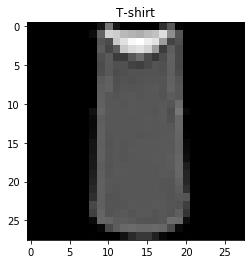

In [86]:
#데이터 이미지 확인
plt.imshow(x_train[2],'gray')
plt.title(labels[y_train[2]])
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

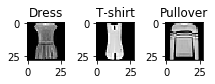

In [94]:
#for
plt.subplot(5,5,1)
plt.imshow(x_train[3],'gray')
plt.title(labels[y_train[3]])
plt.subplot(5,5,2)
plt.imshow(x_train[4],'gray')
plt.title(labels[y_train[4]])
plt.subplot(5,5,3)
plt.imshow(x_train[5],'gray')
plt.title(labels[y_train[5]])

plt.show



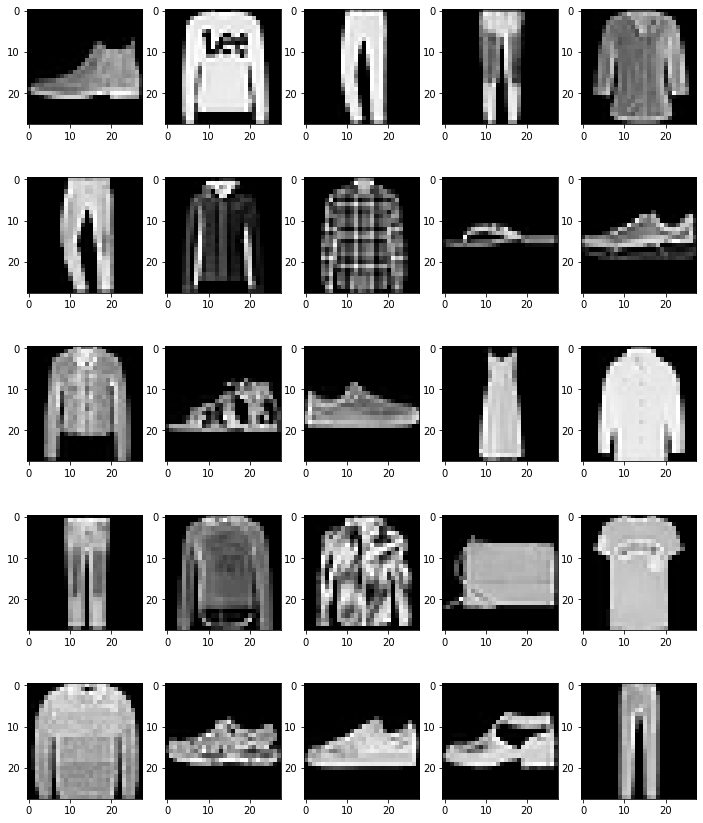

In [103]:
plt.figure(figsize=(12,15))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_test[i-1],'gray')
    #plt.title(labels[y_test[i-1]])
plt.show()

In [65]:
x=

for i in range(9):
    for l in range(9):
        while 

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [134]:
#ANN 모델 만들기 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [135]:
#옵티마이저, 손실함수, 척도 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [136]:
#모델 학습
model.fit(x_train[:], y_train[:], epochs= 20)


Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.5608 - accuracy: 0.8023
Epoch 2/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4010 - accuracy: 0.8561
Epoch 3/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3618 - accuracy: 0.8677
Epoch 4/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3410 - accuracy: 0.8732
Epoch 5/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3263 - accuracy: 0.8783
Epoch 6/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3144 - accuracy: 0.8828
Epoch 7/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3017 - accuracy: 0.8894
Epoch 8/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2940 - accuracy: 0.8905
Epoch 9/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2845 - accuracy: 0.8942
Epoch 10/20
60

In [137]:
model.evaluate(x_test,y_test,verbose=2)

10000/1 - 1s - loss: 0.3175 - accuracy: 0.8772


[0.37237565236091613, 0.8772]

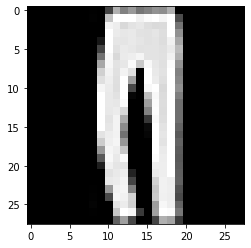

(1, 28, 28)
[[  0 100   0   0   0   0   0   0   0   0]]
Trouser
y_test: Trouser


In [138]:
# 결과분석
test_num = 2
plt.imshow(x_test[test_num],'gray')
plt.show()

test_img = np.expand_dims(x_test[test_num], axis=0)
print(test_img.shape)
result = model.predict(test_img)
print((result*100).astype(int))
print(labels[np.argmax(result)])
print("y_test:",labels[y_test[test_num]])

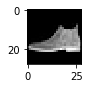

[[ 0  0  0  0  0  5  0  4  0 89]]
Ankle boot
y_test: Ankle boot


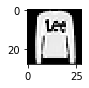

[[ 0  0 93  0  0  0  5  0  0  0]]
Pullover
y_test: Pullover


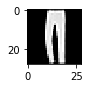

[[ 0 99  0  0  0  0  0  0  0  0]]
Trouser
y_test: Trouser


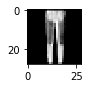

[[ 0 98  0  1  0  0  0  0  0  0]]
Trouser
y_test: Trouser


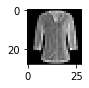

[[ 2  0  5  4  2  0 82  0  2  0]]
Shirt
y_test: Shirt


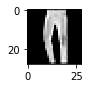

[[ 0 98  0  0  0  0  0  0  0  0]]
Trouser
y_test: Trouser


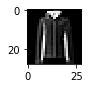

[[ 0  0  0  0 79  0 19  0  0  0]]
Coat
y_test: Coat


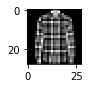

[[ 0  0 10  0 20  0 67  0  1  0]]
Shirt
y_test: Shirt


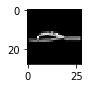

[[ 0  0  0  2  2 36  4 44  6  1]]
Sneaker
y_test: Sandal


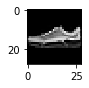

[[ 0  0  0  0  0  0  0 99  0  0]]
Sneaker
y_test: Sneaker


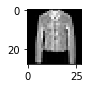

[[ 0  1 37  0 41  0 19  0  0  0]]
Coat
y_test: Coat


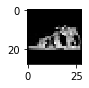

[[ 0  0  0  0  0 36  0 16  2 42]]
Ankle boot
y_test: Sandal


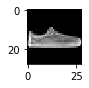

[[ 0  0  0  0  0 81  0  6 12  0]]
Sandal
y_test: Sneaker


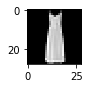

[[ 0  0  0 99  0  0  0  0  0  0]]
Dress
y_test: Dress


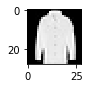

[[ 0  0  4  0 64  0 18  0 10  0]]
Coat
y_test: Coat


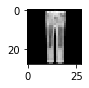

[[ 0 94  0  4  0  0  0  0  0  0]]
Trouser
y_test: Trouser


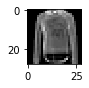

[[ 5  2 67  1  4  0 18  0  0  0]]
Pullover
y_test: Pullover


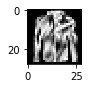

[[ 2  0  5  0 22  0 65  0  3  0]]
Shirt
y_test: Coat


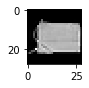

[[ 0  0  0  0  0  1  1  0 96  0]]
Bag
y_test: Bag


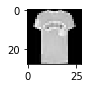

[[97  0  0  1  0  0  0  0  0  0]]
T-shirt
y_test: T-shirt


In [125]:
# 결과분석
for i in range(20):
    test_num = i
    plt.figure(figsize=(1,1))
    plt.imshow(x_test[test_num],'gray')
    plt.show()

    test_img = np.expand_dims(x_test[test_num], axis=0)
    result = model.predict(test_img)
    print((result*100).astype(int))
    print(labels[np.argmax(result)])
    print("y_test:",labels[y_test[test_num]])
    